In [6]:
# !pip installs not needed for Jupyter Lab notebook and were deleted.

# Here we imported the sdame code for the Supervised machine learning trading bot since some of the charts and graphs cannot run in Google Colab.

#from getpass import getpass
#secret = getpass('Enter the secret value')

import os
import requests
import json
import pandas as pd

#from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi

import numpy as np
%matplotlib inline
import hvplot.pandas
from decouple import config
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from finta import TA

import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#from MCForecastTools import mc_simulation

style.use('ggplot')

from mc_simulation import AverageModel as am
from mc_simulation import VolatilityModel as vm
from mc_simulation import MonteCarloSimulation as mcs

# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline


#API_USERNAME = config('USER')
#API_KEY = config('KEY')

In [12]:
# Make X and Y Data Sets


# Read the file in dataframe
 
 # Dataset is now stored in a Pandas Dataframe
 # url_gh is the code to read the csv file from git hub 
 # AAPL_gh_df is to define the dataframe that holds the csv file

url_gh = 'https://raw.githubusercontent.com/KaliPatternbraker/Project_2_Team_3/main/aapl_stock_price_Jan_01_2021_to_April_7_2022.csv'
AAPL_df = pd.read_csv(url_gh)

# Full file_path name = './Users/kalyana/Desktop/Project_2_Team_3/Project_2_Team_3/aapl_stock_price_Jan_01_2021_to_April_7_2022.csv
# This is path name of csv file: Project_2_Team_3/aapl_stock_price_Jan_01_2021_to_April_7_2022.csv

#file_path = './aapl_stock_price_Jan_01_2021_to_April_7_2022.csv'

#commenting out the code below because it worked n jupyter lab but not in Google Colab
#AAPL_df = pd.read_csv(Path(file_path),index_col='Date', parse_dates=True, infer_datetime_format=True)

AAPL_df['Adj Close'] = AAPL_df['Close'].pct_change()

AAPL_df = AAPL_df.dropna()

AAPL_df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
1,1/5/21,128.889999,131.740005,128.429993,131.009995,0.012364,97664900
2,1/6/21,127.720001,131.050003,126.379997,126.599998,-0.033662,155088000
3,1/7/21,128.360001,131.630005,127.860001,130.919998,0.034123,109578200
4,1/8/21,132.429993,132.630005,130.229996,132.050003,0.008631,105158200
5,1/11/21,129.190002,130.169998,128.500000,128.979996,-0.023249,100384500


Text(0.5, 1.0, 'Apple Open & Close, High & Low')

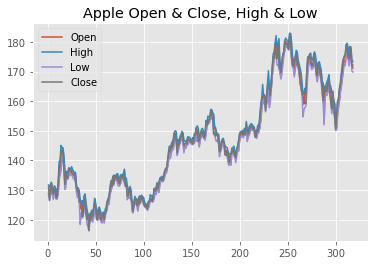

In [13]:
ax = AAPL_df[['Open','High','Low','Close']].plot()
ax.set_title('Apple Open & Close, High & Low')

Text(0.5, 1.0, 'Apple Adjusted Close')

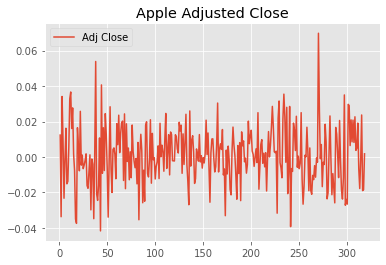

In [14]:
ax = AAPL_df[['Adj Close']].plot()
ax.set_title('Apple Adjusted Close')

Text(0.5, 1.0, 'Apple Volume')

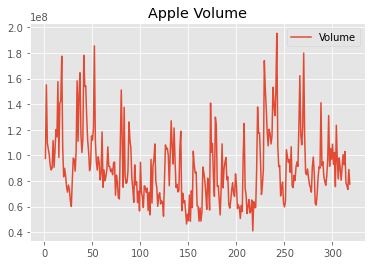

In [15]:
ax = AAPL_df[['Volume']].plot()
ax.set_title('Apple Volume')

<AxesSubplot:>

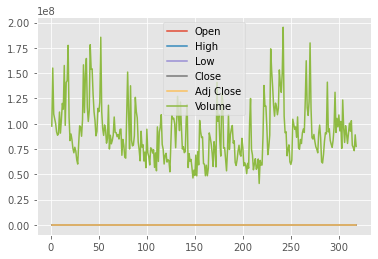

In [16]:
import hvplot.pandas

AAPL_df.hvplot.line()
AAPL_df["trade_type"]=np.nan
previous_price=0

for index,row in AAPL_df.iterrows():
    if previous_price==0:
        AAPL_df.loc[index,"trade_type"]="buy"
        
    elif row["Close"] < previous_price:
            AAPL_df.loc[index,"trade_type"]="buy"
    

    elif row["Close"] > (1.005*previous_price):
            AAPL_df.loc[index,"trade_type"]="sell"
    else:
         AAPL_df.loc[index, "trade_type"] = "hold"
            
previous_price=row["Close"]

if index == AAPL_df.index[-1]:
    AAPL_df.loc[index, "trade_type"] = "sell"

AAPL_df.plot()



In [17]:
AAPL_df["cost/proceeds"]=np.nan
share_size = 1
accumulated_shares = 0

for index, row in AAPL_df.iterrows():

    # buy if the previous_price is 0, in other words, buy on the first day
    if previous_price == 0:
        AAPL_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        AAPL_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size

    # buy if the current day's price is less than the previous day's price
    elif row["Close"] < previous_price:
        AAPL_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        AAPL_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size
    elif row["Close"] > (1.005*previous_price):
        AAPL_df.loc[index, "trade_type"] = "sell"

In [18]:
if index == AAPL_df.index[-1]:
    AAPL_df.loc[index, "trade_type"] = "sell"

#Initialize trade_type column to track buys and sells
AAPL_df["trade_type"] = np.nan

# Initialize a cost/proceeds column for recording trade metrics
AAPL_df["cost/proceeds"] = np.nan
AAPL_df["accumulated_shares"] = np.nan
# Initialize share size and accumulated shares
share_size = 1
accumulated_shares = 0

# Initialize variable to hold previous price
previous_price = 0

# Loop through the Pandas DataFrame and initiate a trade at each iteration
for index, row in AAPL_df.iterrows():

    # buy if the previous_price is 0, in other words, buy on the first day
    if previous_price == 0:
        AAPL_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        AAPL_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size
        AAPL_df.loc[index, "accumulated_shares"] = accumulated_shares
    # buy if the current day's price is less than the previous day's price
    elif row["Close"] < 0.98*previous_price:
        AAPL_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        AAPL_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size
        AAPL_df.loc[index, "accumulated_shares"] = accumulated_shares
    # hold if the current day's price is greater than the previous day's price
    elif row["Close"] > 1.02*previous_price:
        AAPL_df.loc[index, "trade_type"] = "sell"
        AAPL_df.loc[index, "cost/proceeds"] = (row["Close"] * accumulated_shares)
        accumulated_shares=0
        AAPL_df.loc[index, "accumulated_shares"] = accumulated_shares
        
    # hold if the current day's price is equal to the previous day's price
    else:
        AAPL_df.loc[index, "trade_type"] = "hold"
        AAPL_df.loc[index, "accumulated_shares"] = accumulated_shares
    # update the previous_price to the current row's price
    previous_price = row["Close"]

    # if the index is the last index of the DataFrame, sell
    if index == AAPL_df.index[-1]:
        AAPL_df.loc[index, "trade_type"] = "sell"

        # calculate the proceeds by multiplying the last day's price by the accumulated shares
        AAPL_df.loc[index, "cost/proceeds"] = row["Close"] * accumulated_shares
        AAPL_df.loc[index, "accumulated_shares"] = accumulated_shares
# Review the DataFrame
AAPL_df

,Date,Open,High,Low,Close,Adj Close,Volume,trade_type,cost/proceeds,accumulated_shares
1,1/5/21,128.889999,131.740005,128.429993,131.009995,0.012364,97664900,buy,-131.009995,1.0
2,1/6/21,127.720001,131.050003,126.379997,126.599998,-0.033662,155088000,buy,-126.599998,2.0
3,1/7/21,128.360001,131.630005,127.860001,130.919998,0.034123,109578200,sell,261.839996,0.0
4,1/8/21,132.429993,132.630005,130.229996,132.050003,0.008631,105158200,hold,NaN,0.0
5,1/11/21,129.190002,130.169998,128.500000,128.979996,-0.023249,100384500,buy,-128.979996,1.0
...,...,...,...,...,...,...,...,...,...,...
314,4/1/22,174.029999,174.880005,171.940002,174.309998,-0.001718,78699800,hold,NaN,0.0
315,4/4/22,174.570007,178.490005,174.440002,178.440002,0.023693,76468400,sell,0.000000,0.0
316,4/5/22,177.500000,178.300003,174.419998,175.059998,-0.018942,73401800,hold,NaN,0.0
317,4/6/22,172.360001,173.630005,170.130005,171.830002,-0.018451,89058800,hold,NaN,0.0


In [19]:
total_profit_loss = round(AAPL_df["cost/proceeds"].sum(),2)
print(f"The total profit/loss of the trading strategy is ${total_profit_loss}.")

The total profit/loss of the trading strategy is $69.8.


In [20]:
invested_capital = 0

# Calculate the invested capital by adding the cost of all buy trades
for index, row in AAPL_df.iterrows():
    if row["trade_type"] == "buy":
        invested_capital = invested_capital + row["cost/proceeds"]


# Calculate the return on investment (ROI)
roi = round((total_profit_loss / -(invested_capital)) * 100, 2)

# Print the ROI
print(f"The trading algorithm resulted in a return on investment of {roi}%")

The trading algorithm resulted in a return on investment of 1.46%


In [21]:
signals_df = AAPL_df.loc[:,["Close"]]

short_window = 50
long_window = 100

signals_df['SMA50'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA100'] = signals_df['Close'].rolling(window=long_window).mean()
signals_df['Signal'] = 0.0
signals_df

,Close,SMA50,SMA100,Signal
1,131.009995,NaN,NaN,0.0
2,126.599998,NaN,NaN,0.0
3,130.919998,NaN,NaN,0.0
4,132.050003,NaN,NaN,0.0
5,128.979996,NaN,NaN,0.0
...,...,...,...,...
314,174.309998,167.021001,167.548300,0.0
315,178.440002,167.341601,167.824600,0.0
316,175.059998,167.610401,168.096000,0.0
317,171.830002,167.851401,168.335601,0.0


In [22]:
signals_df['Signal'][short_window:] = np.where(
    signals_df['SMA50'][short_window:] > signals_df['SMA100'][short_window:], 1.0, 0.0
)
signals_df['Entry/Exit'] = signals_df['Signal'].diff()


In [23]:
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = signals_df[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = signals_df[['SMA50', 'SMA100']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="Apple - SMA50, SMA100, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

In [131]:
AAPL_df

,Date,Open,High,Low,Close,Adj Close,Volume,trade_type,cost/proceeds,accumulated_shares
1,1/5/21,128.889999,131.740005,128.429993,131.009995,0.012364,97664900,buy,-131.009995,1.0
2,1/6/21,127.720001,131.050003,126.379997,126.599998,-0.033662,155088000,buy,-126.599998,2.0
3,1/7/21,128.360001,131.630005,127.860001,130.919998,0.034123,109578200,sell,261.839996,0.0
4,1/8/21,132.429993,132.630005,130.229996,132.050003,0.008631,105158200,hold,NaN,0.0
5,1/11/21,129.190002,130.169998,128.500000,128.979996,-0.023249,100384500,buy,-128.979996,1.0
...,...,...,...,...,...,...,...,...,...,...
314,4/1/22,174.029999,174.880005,171.940002,174.309998,-0.001718,78699800,hold,NaN,0.0
315,4/4/22,174.570007,178.490005,174.440002,178.440002,0.023693,76468400,sell,0.000000,0.0
316,4/5/22,177.500000,178.300003,174.419998,175.059998,-0.018942,73401800,hold,NaN,0.0
317,4/6/22,172.360001,173.630005,170.130005,171.830002,-0.018451,89058800,hold,NaN,0.0


In [ ]:
# Use Support Vector Machines (SVM) to create a classifier model known as a Support Vector Classifier (SVC)
# Create a function to find the optimal components for the trading algorithm
# Filter the date index and close columns


import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


def trading_algo(short_window_input, long_window_input, training_period_input):
    signals_df = AAPL_df.loc[:, ["Close"]]

    # Use the pct_change function to generate  returns from close prices
    signals_df["Actual Returns"] = signals_df["Close"].pct_change()

    # Drop all NaN values from the DataFrame
    signals_df = signals_df.dropna()


    short_window = short_window_input
    long_window =long_window_input

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()


# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = 0


# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Select the start of the training period
training_begin = X.index.min()

# Select the ending period for the training data with an offset of 3 months
#training_end = X.index.min() + DateOffset(months=training_period_input)
    
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)
   

In [ ]:
 # Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]


# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]


# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()

# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)


# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)


# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = signals_df["Actual Returns"] * predictions_df["Predicted"]


  
# Create the column names for the dataframe to find the optimal components for the algorithm. The column names will be generated by the for loop
predictions_df[f'{short_window}_{long_window}_{training_period_input}'] = (1+predictions_df["Strategy Returns"]).cumprod()

# Plot the actual returns versus the strategy returns
#(1+predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot(title= f"{short_window}, {long_window}, {training_period_input}")
    
return predictions_df


predictions_df = trading_algo(short_window_input=10, long_window_input=200, training_period_input=20)
   
print(predictions_df.head())

    

In [133]:
# Import S&P 500 Stock price Data from January 1, 2021 to April 7, 2021

In [34]:
# Read the S&P 500 CSV data into a DataFrame

from pathlib import Path

sp500_csv = Path("sp500_stock_price_data_jan_01_2021_to_april_07_2022_.csv")

sp500_df = pd.read_csv(sp500_csv)

sp500_df["Close"] = sp500_df["Close"].astype(float)


# Display the DataFrame
sp500_df.head(10)



,Date,Open,High,Low,Close,Adj Close,Volume
0,4-Jan-21,3764.61,3769.99,3662.71,3700.65,3700.65,5.006680e+09
1,5-Jan-21,3698.02,3737.83,3695.07,3726.86,3726.86,4.582620e+09
2,6-Jan-21,3712.20,3783.04,3705.34,3748.14,3748.14,6.049970e+09
3,7-Jan-21,3764.71,3811.55,3764.71,3803.79,3803.79,5.080870e+09
4,8-Jan-21,3815.05,3826.69,3783.60,3824.68,3824.68,4.764180e+09
5,11-Jan-21,3803.14,3817.86,3789.02,3799.61,3799.61,4.450500e+09
6,12-Jan-21,3801.62,3810.78,3776.51,3801.19,3801.19,4.977210e+09
7,13-Jan-21,3802.23,3820.96,3791.50,3809.84,3809.84,4.590420e+09
8,14-Jan-21,3814.98,3823.60,3792.86,3795.54,3795.54,5.180140e+09
9,15-Jan-21,3788.73,3788.73,3749.62,3768.25,3768.25,5.353060e+09


In [35]:
sp500_df['Adj Close'] = sp500_df['Close'].pct_change()

sp500_df = sp500_df.dropna()

sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,5-Jan-21,3698.02,3737.83,3695.07,3726.86,0.007083,4.582620e+09
2,6-Jan-21,3712.20,3783.04,3705.34,3748.14,0.005710,6.049970e+09
3,7-Jan-21,3764.71,3811.55,3764.71,3803.79,0.014847,5.080870e+09
4,8-Jan-21,3815.05,3826.69,3783.60,3824.68,0.005492,4.764180e+09
5,11-Jan-21,3803.14,3817.86,3789.02,3799.61,-0.006555,4.450500e+09


In [36]:
#sp500_df = pd.read_csv(file_path),index_col='Date', parse_dates=True, infer_datetime_format=True)

sp500_df['Adj Close'] = sp500_df['Close'].pct_change()

sp500_df = sp500_df.dropna()

sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2,6-Jan-21,3712.20,3783.04,3705.34,3748.14,0.005710,6.049970e+09
3,7-Jan-21,3764.71,3811.55,3764.71,3803.79,0.014847,5.080870e+09
4,8-Jan-21,3815.05,3826.69,3783.60,3824.68,0.005492,4.764180e+09
5,11-Jan-21,3803.14,3817.86,3789.02,3799.61,-0.006555,4.450500e+09
6,12-Jan-21,3801.62,3810.78,3776.51,3801.19,0.000416,4.977210e+09


Text(0.5, 1.0, 'S&P500 Open & Close, High & Low')

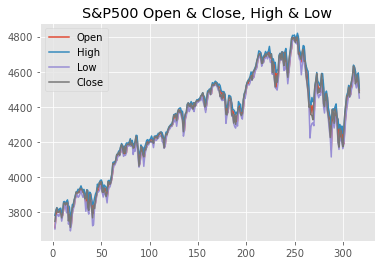

In [37]:
ax = sp500_df[['Open','High','Low','Close']].plot()
ax.set_title('S&P500 Open & Close, High & Low')

Text(0.5, 1.0, 'S&P500 Adjusted Close')

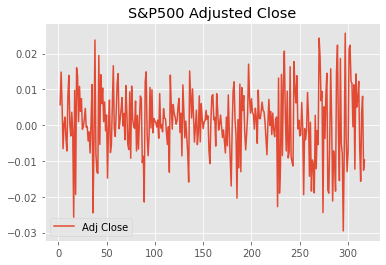

In [38]:
ax = sp500_df[['Adj Close']].plot()
ax.set_title('S&P500 Adjusted Close')

Text(0.5, 1.0, 'S&P500 Volume')

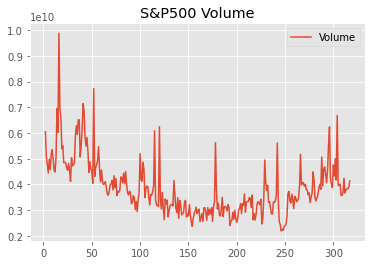

In [39]:
ax = sp500_df[['Volume']].plot()
ax.set_title('S&P500 Volume')

<AxesSubplot:>

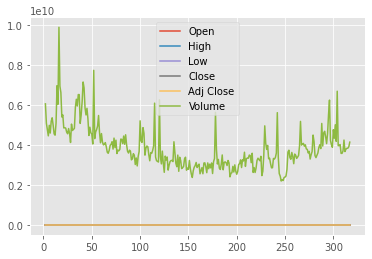

In [143]:
import hvplot.pandas

sp500_df.hvplot.line()
sp500_df["trade_type"]=np.nan
previous_price=0

for index,row in sp500_df.iterrows():
    if previous_price==0:
        sp500_df.loc[index,"trade_type"]="buy"
        
    elif row["Close"] < previous_price:
            sp500_df.loc[index,"trade_type"]="buy"
    

    elif row["Close"] > (1.005*previous_price):
            sp500_df.loc[index,"trade_type"]="sell"
    else:
         sp500_df.loc[index, "trade_type"] = "hold"
            
previous_price=row["Close"]

if index == sp500_df.index[-1]:
    sp500_df.loc[index, "trade_type"] = "sell"

sp500_df.plot()



In [145]:
sp500_df["cost/proceeds"]=np.nan
share_size = 1
accumulated_shares = 0

for index, row in sp500_df.iterrows():

    # buy if the previous_price is 0, in other words, buy on the first day
    if previous_price == 0:
        sp500_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        sp500_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size

    # buy if the current day's price is less than the previous day's price
    elif row["Close"] < previous_price:
        sp500_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        sp500_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size
    elif row["Close"] > (1.005*previous_price):
        sp500_df.loc[index, "trade_type"] = "sell"

In [148]:
if index == sp500_df.index[-1]:
    sp500_df.loc[index, "trade_type"] = "sell"

#Initialize trade_type column to track buys and sells
sp500_df["trade_type"] = np.nan

# Initialize a cost/proceeds column for recording trade metrics
sp500_df["cost/proceeds"] = np.nan
sp500_df["accumulated_shares"] = np.nan
# Initialize share size and accumulated shares
share_size = 1
accumulated_shares = 0

# Initialize variable to hold previous price
previous_price = 0

# Loop through the Pandas DataFrame and initiate a trade at each iteration
for index, row in sp500_df.iterrows():

    # buy if the previous_price is 0, in other words, buy on the first day
    if previous_price == 0:
        sp500_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        sp500_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size
        sp500_df.loc[index, "accumulated_shares"] = accumulated_shares
    # buy if the current day's price is less than the previous day's price
    elif row["Close"] < 0.98*previous_price:
        sp500_df.loc[index, "trade_type"] = "buy"

        # calculate the cost of the trade by multiplying the current day's price
        # by the share_size, or number of shares purchased
        sp500_df.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)

        # add the number of shares purchased to the accumulated shares
        accumulated_shares += share_size
        sp500_df.loc[index, "accumulated_shares"] = accumulated_shares
    # hold if the current day's price is greater than the previous day's price
    elif row["Close"] > 1.02*previous_price:
        sp500_df.loc[index, "trade_type"] = "sell"
        sp500_df.loc[index, "cost/proceeds"] = (row["Close"] * accumulated_shares)
        accumulated_shares=0
        sp500_df.loc[index, "accumulated_shares"] = accumulated_shares
        
    # hold if the current day's price is equal to the previous day's price
    else:
        sp500_df.loc[index, "trade_type"] = "hold"
        sp500_df.loc[index, "accumulated_shares"] = accumulated_shares
    # update the previous_price to the current row's price
    previous_price = row["Close"]

    # if the index is the last index of the DataFrame, sell
    if index == sp500_df.index[-1]:
        sp500_df.loc[index, "trade_type"] = "sell"

        # calculate the proceeds by multiplying the last day's price by the accumulated shares
        sp500_df.loc[index, "cost/proceeds"] = row["Close"] * accumulated_shares
        sp500_df.loc[index, "accumulated_shares"] = accumulated_shares
# Review the DataFrame
sp500_df

,Date,Open,High,Low,Close,Adj Close,Volume,trade_type,cost/proceeds,accumulated_shares
2,6-Jan-21,3712.20,3783.04,3705.34,3748.14,0.005710,6.049970e+09,buy,-3748.14,1.0
3,7-Jan-21,3764.71,3811.55,3764.71,3803.79,0.014847,5.080870e+09,hold,NaN,1.0
4,8-Jan-21,3815.05,3826.69,3783.60,3824.68,0.005492,4.764180e+09,hold,NaN,1.0
5,11-Jan-21,3803.14,3817.86,3789.02,3799.61,-0.006555,4.450500e+09,hold,NaN,1.0
6,12-Jan-21,3801.62,3810.78,3776.51,3801.19,0.000416,4.977210e+09,hold,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
313,31-Mar-22,4599.02,4603.07,4530.41,4530.41,-0.015653,3.782040e+09,hold,NaN,0.0
314,1-Apr-22,4540.32,4548.70,4507.57,4545.86,0.003410,3.828290e+09,hold,NaN,0.0
315,4-Apr-22,4547.97,4583.50,4539.21,4582.64,0.008091,3.833500e+09,hold,NaN,0.0
316,5-Apr-22,4572.45,4593.45,4514.17,4525.12,-0.012552,3.906230e+09,hold,NaN,0.0


In [151]:
total_profit_loss = round(sp500_df["cost/proceeds"].sum(),2)
print(f"The total profit/loss of the trading strategy is ${total_profit_loss}.")

The total profit/loss of the trading strategy is $1415.56.


In [157]:
invested_capital = 0

# Calculate the invested capital by adding the cost of all buy trades
for index, row in sp500_df.iterrows():
    if row["trade_type"] == "buy":
        invested_capital = invested_capital + row["cost/proceeds"]


# Calculate the return on investment (ROI)
roi = round((total_profit_loss / -(invested_capital)) * 100, 2)

# Print the ROI
print(f"The trading algorithm resulted in a return on investment of {roi}%")

The trading algorithm resulted in a return on investment of 3.79%


In [158]:
signals_df = sp500_df.loc[:,["Close"]]

short_window = 50
long_window = 100

signals_df['SMA50'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA100'] = signals_df['Close'].rolling(window=long_window).mean()
signals_df['Signal'] = 0.0

signals_df

# Here is reference code:
# df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
#                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
#                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
#                             pd.NaT]})
# df
#        name        toy       born
# 0    Alfred        NaN        NaT
# 1    Batman  Batmobile 1940-04-25
# 2  Catwoman   Bullwhip        NaT

signals_df = pd.DataFrame({"Close": ['3748.14', 
                           "SMA50": [np.nan, 
                           "SMA100": [np.NaN,
                           "Signal": [0.0
                                      
                                      

,Close,SMA50,SMA100,Signal
2,3748.14,NaN,NaN,0.0
3,3803.79,NaN,NaN,0.0
4,3824.68,NaN,NaN,0.0
5,3799.61,NaN,NaN,0.0
6,3801.19,NaN,NaN,0.0
...,...,...,...,...
313,4530.41,4411.0764,4543.3668,0.0
314,4545.86,4412.3390,4541.8084,0.0
315,4582.64,4416.0330,4540.7823,0.0
316,4525.12,4418.3328,4539.5664,0.0


In [154]:
signals_df['Signal'][short_window:] = np.where(
    signals_df['SMA50'][short_window:] > signals_df['SMA100'][short_window:], 1.0, 0.0
)
signals_df['Entry/Exit'] = signals_df['Signal'].diff()


In [155]:
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = signals_df[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = signals_df[['SMA50', 'SMA100']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="Apple - SMA50, SMA100, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

In [ ]:
# Use Support Vector Machines (SVM) to create a classifier model known as a Support Vector Classifier (SVC)
# Create a function to find the optimal components for the trading algorithm
# Filter the date index and close columns


import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


def trading_algo(short_window_input, long_window_input, training_period_input):
    signals_df = sp500_df.loc[:, ["Close"]]

    # Use the pct_change function to generate  returns from close prices
    signals_df["Actual Returns"] = signals_df["Close"].pct_change()

    # Drop all NaN values from the DataFrame
    signals_df = signals_df.dropna()


    short_window = short_window_input
    long_window =long_window_input

    # Generate the fast and slow simple moving averages (4 and 100 days, respectively)
    signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
    signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()

    signals_df = signals_df.dropna()


    # Initialize the new Signal column
    signals_df['Signal'] = 0.0

    # When Actual Returns are greater than or equal to 0, generate signal to buy stock long
    signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

    # When Actual Returns are less than 0, generate signal to sell stock short
    signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = 0


    # Calculate the strategy returns and add them to the signals_df DataFrame
    signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

    # Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
    X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

    # Create the target set selecting the Signal column and assiging it to y
    y = signals_df['Signal']

    # Select the start of the training period
    training_begin = X.index.min()

    # Select the ending period for the training data with an offset of 3 months
    training_end = X.index.min() + DateOffset(months=training_period_input)


    # Generate the X_train and y_train DataFrames
    X_train = X.loc[training_begin:training_end]
    y_train = y.loc[training_begin:training_end]


    # Generate the X_test and y_test DataFrames
    X_test = X.loc[training_end+DateOffset(hours=1):]
    y_test = y.loc[training_end+DateOffset(hours=1):]


    # Scale the features DataFrames

    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Apply the scaler model to fit the X-train data
    X_scaler = scaler.fit(X_train)

    # Transform the X_train and X_test DataFrames using the X_scaler
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    X_test_scaled

    # From SVM, instantiate SVC classifier model instance
    svm_model = svm.SVC()

    # Fit the model to the data using the training data
    svm_model = svm_model.fit(X_train_scaled, y_train)

    # Use the testing data to make the model predictions
    svm_pred = svm_model.predict(X_test_scaled)


    # Use a classification report to evaluate the model using the predictions and testing data
    svm_testing_report = classification_report(y_test, svm_pred)


    # Create a new empty predictions DataFrame.

    # Create a predictions DataFrame
    predictions_df = pd.DataFrame(index=X_test.index)

    # Add the SVM model predictions to the DataFrame
    predictions_df['Predicted'] = svm_pred

    # Add the actual returns to the DataFrame
    predictions_df['Actual Returns'] = signals_df["Actual Returns"]

    # Add the strategy returns to the DataFrame
    predictions_df['Strategy Returns'] = signals_df["Actual Returns"] * predictions_df["Predicted"]


  
    # Create the column names for the dataframe to find the optimal components for the algorithm. The column names will be generated by the for loop
    predictions_df[f'{short_window}_{long_window}_{training_period_input}'] = (1+predictions_df["Strategy Returns"]).cumprod()
    # Plot the actual returns versus the strategy returns
    #(1+predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot(title= f"{short_window}, {long_window}, {training_period_input}")

# Building the Decision Tree Model on our dataset   
# from sklearn.tree import DecisionTreeRegressor
# #DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
# DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train_scaled, y_train)
# DT_predict = DT_model.predict(X_test) 
#Predictions on Testing data
# print(DT_predict)

# # example of training a final classification model
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import make_blobs
# # generate 2d classification dataset
# X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# # fit final model
# model = LogisticRegression()
# model.fit(X, y)
# model.predict(AAPL_df)

    
    

In [ ]:
# Next Steps by Attempting Unsupervised Machine Learning using K-values

Attempting code for Unsupervised learning

In [ ]:
# Imports
#import pandas as pd
#import numpy as np
#from pathlib import Path
#import hvplot.pandas
#import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
import numpy as np

   # Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

    # Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

rng = np.random.RandomState(0)
# X, y = make_classification(n_features=5, random_state=rng)

# We are testing the SGDCClassifier unsupervised machine learning here
sgd = SGDClassifier(random_state=rng)

sgd.fit(X, y).coef_

from sklearn.model_selection import KFold
import numpy as np

# We are testing the KFold unsupervised machine learning here

# X = y = np.arange(10)
# rng = np.random.RandomState(0)
cv = KFold(n_splits=2, shuffle=True, random_state=rng)

for train, test in cv.split(X, y):
  print(train, test)

for train, test in cv.split(X, y):
  print(train, test)

scaler = StandardScaler()

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import numpy as np

# We are testing the RandomForestClassifier unsupervised machine learning here
rf_123 = RandomForestClassifier(random_state=123)
cross_val_score(rf_123, X, y)

rf_inst = RandomForestClassifier(random_state=np.random.RandomState(0))
cross_val_score(rf_inst, X, y)

In [ ]:
import numpy as np

import scipy.stats as sp
class GaussianMixModel(object):
    def __init__(self, X, k=2):
        # Algorithm can work for any number of columns in dataset
        X = np.asarray(X)
        self.m, self.n = X.shape
        self.data = X.copy()
        print (np.mean(X))
        # number of mixtures
        self.k = k

    def _init(self):
        # init mixture means/sigmas
        self.mean_arr = np.asmatrix(np.random.random((self.k, self.n))+np.mean(self.data))
        #self.mean_arr[0]=0;
        #self.mean_arr[1]=25;
        self.sigma_arr = np.array([np.asmatrix(np.identity(self.n)) for i in range(self.k)])
        self.phi = np.ones(self.k)/self.k
        self.Z = np.asmatrix(np.empty((self.m, self.k), dtype=float))
        #Z Latent Variable giving probability of each point for each distribution

    def fit(self, tol=1e-4):
        # Algorithm will run unti max of log-likelihood is achieved
        self._init()
        num_iters = 0
        logl = 1
        previous_logl = 0
        while(logl-previous_logl > tol):
            previous_logl = self.loglikelihood()
            self.e_step()
            self.m_step()
            num_iters += 1
            logl = self.loglikelihood()
            print('Iteration %d: log-likelihood is %.6f'%(num_iters, logl))
        print('Terminate at %d-th iteration:log-likelihood is %.6f'%(num_iters, logl))

    def loglikelihood(self):
        logl = 0
        for i in range(self.m):
            tmp = 0
            for j in range(self.k):
                #print(self.sigma_arr[j])
                tmp += sp.multivariate_normal.pdf(self.data[i, :],self.mean_arr[j, :].A1,self.sigma_arr[j, :]) * self.phi[j]
            logl += np.log(tmp)
        return logl




    def e_step(self):
        #Finding probability of each point belonging to each pdf and putting it in latent variable Z
        for i in range(self.m):
            den = 0
            for j in range(self.k):
                #print (self.data[i, :])
                num = sp.multivariate_normal.pdf(self.data[i, :],
                                                       self.mean_arr[j].A1,
                                                       self.sigma_arr[j]) *\
                      self.phi[j]
                den += num

                self.Z[i, j] = num
            self.Z[i, :] /= den
            assert self.Z[i, :].sum() - 1 < 1e-4  # Program stop if this condition is false

    def m_step(self):
        #Updating mean and variance
        for j in range(self.k):
            const = self.Z[:, j].sum()
            self.phi[j] = 1/self.m * const
            _mu_j = np.zeros(self.n)
            _sigma_j = np.zeros((self.n, self.n))
            for i in range(self.m):
                _mu_j += (self.data[i, :] * self.Z[i, j])
                _sigma_j += self.Z[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))

            self.mean_arr[j] = _mu_j / const
            self.sigma_arr[j] = _sigma_j / const


Unsupervised machine learning model to find clustering in AAPL Stock Price


Here we combine our financial Python programming skills with the new unsupervised learning skills to 

The steps are broken out into the following sections:

Import the Data 

The stock data is from 
url_gh = 'https://raw.githubusercontent.com/KaliPatternbraker/Project_2_Team_3/main/aapl_stock_price_Jan_01_2021_to_April_7_2022.csv'
AAPL_df = pd.read_csv(url_gh)

Prepare the Data 
Find the Best Value for k Using the Original Data
Cluster AAPL stock prices with K-means Using the Original Data
Optimize Clusters with Principal Component Analysis
Find the Best Value for k Using the PCA Data
Cluster the AAPL stock prices with K-means Using the PCA Data
Visualize and Compare the Results

This section imports the data into a new DataFrame. It follows these steps:

Read the “url_gh” AAPL stock data file from a web url_gh into a DataFrame, and use index_col="AAPL_id" to set the AAPL stock price as the index. Review the DataFrame.

Generate the summary statistics, and use HvPlot to visualize our data to observe what our DataFrame contains.

Rewind: The Pandasdescribe()function generates summary statistics for a DataFrame.

In [ ]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
# from path import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
url_gh = 'https://raw.githubusercontent.com/KaliPatternbraker/Project_2_Team_3/main/aapl_stock_price_Jan_01_2021_to_April_7_2022.csv'
AAPL_df = pd.read_csv(url_gh)

# Full file_path name = './Users/kalyana/Desktop/Project_2_Team_3/Project_2_Team_3/aapl_stock_price_Jan_01_2021_to_April_7_2022.csv
# This is path name of csv file: Project_2_Team_3/aapl_stock_price_Jan_01_2021_to_April_7_2022.csv

#file_path = './aapl_stock_price_Jan_01_2021_to_April_7_2022.csv'

#commenting out the code below because it worked n jupyter lab but not in Google Colab
#AAPL_df = pd.read_csv(Path(file_path),index_col='Date', parse_dates=True, infer_datetime_format=True)

AAPL_df['Adj Close'] = AAPL_df['Close'].pct_change()

AAPL_df = AAPL_df.dropna()

AAPL_df.head()


In [ ]:
# Generate summary statistics
AAPL_df.describe()

In [ ]:
# Plot your data to see what's in your DataFrame
AAPL_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

Prepare the Data
This section prepares the data before running the K-Means algorithm. It follows these steps:

Use the StandardScaler module from scikit-learn to normalize the CSV file data. This will require us to utilize the fit_transform function.

Create a DataFrame that contains the scaled data. Be sure to set the stock_price index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.

In [ ]:
from pandas.core.arrays import string_
AAPL_df


# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(AAPL_df)
scaled_data

In [ ]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

Find the Best Value for k Using the Original Data
In this section, you will use the elbow method to find the best value for k.

Code the elbow method algorithm to find the best value for k. Use a range from 1 to 11.

Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.

Answer the following question: What is the best value for k?

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))
k_values

In [ ]:
# Create an empy list to store the inertia values
inertia = []

In [ ]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for k in k_values:
    k_model = KMeans(n_clusters=k, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

In [ ]:
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
)

Answer the following question: What is the best value for k?
Question: What is the best value for k?

Answer: The elbow appears to be around 3, because this has a low inertia but still maintains a small number of clusters.

Cluster Cryptocurrencies with K-means Using the Original Data
In this section, you will use the K-Means algorithm with the best value for k found in the previous section to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

Initialize the K-Means model with four clusters using the best value for k.

Fit the K-Means model using the original data.

Predict the clusters to group the cryptocurrencies using the original data. View the resulting array of cluster values.

Create a copy of the original data and add a new column with the predicted clusters.

Create a scatter plot using hvPlot by setting x="price_change_percentage_24h" and y="price_change_percentage_7d". Color the graph points with the labels found using K-Means and add the crypto name in the hover_cols parameter to identify the cryptocurrency represented by each data point.

In [ ]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

In [ ]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_3 = model.predict(df_market_data_scaled)

In [ ]:
# Create a copy of the DataFrame
df_market_data_scaled_predictions = df_market_data_scaled.copy()

In [ ]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_predictions['Predicted Cluster'] = k_3

# Display sample data
df_market_data_scaled_predictions.head()

In [ ]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_market_data_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    title="Elbow Curve", 
    xticks=k_values,
    by="Predicted Cluster",
    hover_cols=[df_market_data_scaled_predictions.index]
)

Optimize Clusters with Principal Component Analysis
In this section, you will perform a principal component analysis (PCA) and reduce the features to three principal components.

Create a PCA model instance and set n_components=3.

Use the PCA model to reduce to three principal components. View the first five rows of the DataFrame.

Retrieve the explained variance to determine how much information can be attributed to each principal component.

Answer the following question: What is the total explained variance of the three principal components?

Create a new DataFrame with the PCA data. Be sure to set the coin_id index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [ ]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_data_scaled_predictions)

# View the first five rows of the DataFrame. 
pca_data[:5]

In [ ]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

Answer the following question: What is the total explained variance of the three principal components?
Question: What is the total explained variance of the three principal components?

In [ ]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
crypto_names = df_market_data_scaled_predictions.index

# Set the coinid column as index
pca_df = pca_df.set_index(crypto_names)

# Display sample data
pca_df

Find the Best Value for k Using the PCA Data
In this section, you will use the elbow method to find the best value for k using the PCA data.

Code the elbow method algorithm and use the PCA data to find the best value for k. Use a range from 1 to 11.

Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.

Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# YOUR CODE HERE!
k_values_list = list(range(1,11))
print(k_values_list)


In [ ]:
# Create an empy list to store the inertia values
# YOUR CODE HERE!
inertia_values = []


In [ ]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
# YOUR CODE HERE!

for i in k_values_list:
    K_model = KMeans(n_clusters = i)


In [ ]:
L#Make a Model
#Fit the Model with X_train_scaled, y_train data
#Make comparision report

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Make models

#Logistic Regression model
LR_model = LogisticRegression(random_state=1)
LR_model.fit(X_train_scaled,y_train)
y_predict_test_LR = LR_model.predict(X_test_scaled)
print('Logistic Regression model')
print(classification_report(y_test,y_predict_test_LR)

In [ ]:
# Import the OHLCV dataset into a Pandas Dataframe
AAPL_df = pd.read_csv(
    url_gh),
index_col='date', 
infer_datetime_format=True, 
parse_dates=True

# Review the DataFrame
print(AAPL_df)

Generate trading signals using short- and long-window SMA values.


In [ ]:
model = LinearRegression().fit(x_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

x_test_scaled = scaler.test()
mean_squared_error(y_test, model.predict(x_test_transformed))


from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
mean_squared_error(y_test, model.predict(X_test))



# Set the short window and long window
short_window = 4
long_window = 100


# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
predictions_df['sma_fast'] = predictions_df['Close'].rolling(window=short_window).mean()
predictions_df['sma_slow'] = predictions_df['Close'].rolling(window=long_window).mean()

predictions_df_df = predictions_df_df.dropna()

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

In [ ]:
sma_fast = 4
sma_slow = 100
ema = 50
volatility_window = 4

signals_df['sma_fast'] = TA.SMA(signals_df, sma_fast)
signals_df['sma_slow'] = TA.SMA(signals_df, sma_slow)
signals_df['ssma'] = TA.SSMA(signals_df)
signals_df['ema'] = TA.EMA(signals_df, ema)
signals_df['dema'] = TA.DEMA(signals_df)
signals_df['tema'] = TA.TEMA(signals_df)
signals_df['trima'] = TA.TRIMA(signals_df)
signals_df['volatility'] = signals_df['Adj Close'].rolling(window=volatility_window).std()

signals_df.dropna(inplace=True)
signals_df

In [ ]:
#Make X Data Set

X = signals_df[['sma_fast', 'ssma', 'ema', 'dema', 'tema','trima', 'volatility', 'sma_slow']].shift().dropna().copy
X


In [ ]:
#Make Y Data Set

#Make the Buy/Sell signal and populate them with two opposing integers: +1 or -1

signals_df['signal'] = 0.0

#Make buy and sell signal
signals_df['signal'] = numpy.where(signals_df['Adj Close'] >=0, 1, -1)

y = signals_df['signal']

In [ ]:
#Make Train and Test Data: X_train, y_train, X_test, y_test
#offset_years as a parameter

offset_years = 8
training_begin = X.index.min()
training_end = training_begin + DateOffset(years=offset_years)

X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

test_begin = X.loc[training_end : ].index.min()
X_test = X.loc[test_begin : ]
y_test = y.loc[test_begin : ]


In [ ]:
#Standardizing Our Data Set

#Scaling the features Dataframes

#Make a StandardScaler instance
scaler = StandardScaler()

#Apply the scaler model to fit the X_train data set
X_scaler = scaler.fit(X_train)

#Transform the X_train and X_test Dataframes using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
#Make a Model
#Fit the Model with X_train_scaled, y_train data
#Make comparision report


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Make models

#Logistic Regression model
LR_model = LogisticRegression(random_state=1)
LR_model.fit(X_train_scaled,y_train)
y_predict_test_LR = LR_model.predict(X_test_scaled)
print('Logistic Regression model')
print(classification_report(y_test,y_predict_test_LR)

# #DecisionTreeClassifier model
DTC_model = DecisionTreeClassifier(random_state=1)
DTC_model.fit(X_train_scaled, y_train)
y_predict_test_DTC = DTC_model.predict(X_test_scaled) 
print('Decision Tree Classifier')
print(classification_report(y_test, y_predict_test_DTC))

# # SVM model
SVM_model = SVC(random_state=1)
SVM_model.fit(X_train_scaled,y_train)
y_predict_test_SVM = SVM_model.predict(X_test_scaled)
print('SVM Classifier')
print(classification_report(y_test,y_predict_test_test_SVM)
      
# # GaussianNB model
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train_scaled,y_train)
y_predict_test_GaussianNB = GaussianNB_model.predict(X_test_scaled)
print('GaussianNB Classifier')
print(classification_report(y_test,y_predit_test_GaussianNB)
      
# #Random Forest Classifier model
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier_model_model.fit(X_train_scaled,y_train)
y_predict_test_GRandomForestClassifier = RandomForestClassifier_model.predict(X_test_scaled)
print('RandomForestClassifier_model')
print(classification_report(y_test,y_predit_test_RandomForestClassifier)
      



Import S&P 500 Data

In [ ]:
# Read the S&P 500 CSV data into a DataFrame
url_sp = 'https://finance.yahoo.com/quote/%5EGSPC/history?period1=1609459200&period2=1649289600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'
df_sp500 = pd.read_csv(url_sp)
                      
# Display the DataFrame
df_sp500.head(10)


df_sp500['adj close'] = df_sp500['close'].pct_change()

df_sp500 = df_sp500.dropna()

df_sp500.head()


In [ ]:
df_sp500['adj close'] = df_sp500['close'].pct_change()

df_sp500 = df_sp500.dropna()

df_sp500.head()